# Data Cleaning Notebook for Combined PUF File

Greatly revised to solve some data problems. 

In [1]:
%matplotlib inline
import random
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

#For standardizing variables
import sklearn.preprocessing as pre


Starting with the Elixhauser Score files.

By averaging, produce 1 score for each DeSYNPuf ID.

In [2]:
elix = pd.read_csv("/home/kylier/python/DS/data/PUF/IPANDOP_FIPS_ELIX_ALL.csv")

In [3]:
elix.shape

(1332236, 57)

In [4]:
for c in elix.columns:
    print(c)

Unnamed: 0
Unnamed: 1
DESYNPUF_ID
BENE_SEX_IDENT_CD
BENE_RACE_CD
SP_STATE_CODE
BENE_COUNTY_CD
FIPS_COUNTY_CODE
FULL_FIPS_CODE
FIPS_STATE_CODE
ICD9_DGNS_CD_1
ICD9_DGNS_CD_2
ICD9_DGNS_CD_3
ICD9_DGNS_CD_4
ICD9_DGNS_CD_5
ICD9_DGNS_CD_6
ICD9_DGNS_CD_7
ICD9_DGNS_CD_8
ICD9_DGNS_CD_9
ICD9_DGNS_CD_10
CLAIM_TYPE
BENE_AGE
YEAR
CHF
Car_Arrhythmia
Valve_Disease
Pulm_Cir_Disorder
PVD
HT_Uncomp
HT_Comp
Paralysis
Neuro_disorder_other
CPD
DM_Uncomp
DM_Comp
Hypo_thyroid
Renal_Failure
Liver_Disease
Peptic_Ulcer_WO_bleeding
AIDS_HIV
Lymphoma
Metastatic_Cancer
Tumor_WO_Metastasis
RA
Coagulopathy
Obesity
Weight_Loss
Fluid_Electrolyte_Disorder
Blood_Loss_Anemia
Deficiency_Anemia
Alcohol_Abuse
Drug_Abuse
Psychoses
Depression
i
TOT_GRP
elx_WEIGHT_SCORE


Drop the first 2 columns (created when the csv file was written out)

Show nulls

In [5]:
elix.drop(columns=elix.columns[0], axis=1, inplace=True)
elix.drop(columns=elix.columns[0], axis=1, inplace=True)
elix.isnull().sum() 

DESYNPUF_ID                         0
BENE_SEX_IDENT_CD                   0
BENE_RACE_CD                        0
SP_STATE_CODE                       0
BENE_COUNTY_CD                      0
FIPS_COUNTY_CODE                14272
FULL_FIPS_CODE                  14272
FIPS_STATE_CODE                 14272
ICD9_DGNS_CD_1                 187985
ICD9_DGNS_CD_2                 576088
ICD9_DGNS_CD_3                 822826
ICD9_DGNS_CD_4                 986948
ICD9_DGNS_CD_5                1097620
ICD9_DGNS_CD_6                1155237
ICD9_DGNS_CD_7                1192973
ICD9_DGNS_CD_8                1219278
ICD9_DGNS_CD_9                1239874
ICD9_DGNS_CD_10               1322764
CLAIM_TYPE                     187912
BENE_AGE                       187912
YEAR                                0
CHF                                 0
Car_Arrhythmia                      0
Valve_Disease                       0
Pulm_Cir_Disorder                   0
PVD                                 0
HT_Uncomp   

In [6]:
elix["ELIX_GRP_TOTAL"] = elix["TOT_GRP"].copy()
elix["ELIX_SCORE"] = elix["elx_WEIGHT_SCORE"].copy()

elix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332236 entries, 0 to 1332235
Data columns (total 57 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   DESYNPUF_ID                 1332236 non-null  object 
 1   BENE_SEX_IDENT_CD           1332236 non-null  int64  
 2   BENE_RACE_CD                1332236 non-null  int64  
 3   SP_STATE_CODE               1332236 non-null  int64  
 4   BENE_COUNTY_CD              1332236 non-null  int64  
 5   FIPS_COUNTY_CODE            1317964 non-null  float64
 6   FULL_FIPS_CODE              1317964 non-null  float64
 7   FIPS_STATE_CODE             1317964 non-null  float64
 8   ICD9_DGNS_CD_1              1144251 non-null  object 
 9   ICD9_DGNS_CD_2              756148 non-null   object 
 10  ICD9_DGNS_CD_3              509410 non-null   object 
 11  ICD9_DGNS_CD_4              345288 non-null   object 
 12  ICD9_DGNS_CD_5              234616 non-null   object 
 1

In [7]:
elix = elix.drop(elix.columns[[1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 
                                   24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 
                                   43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]], axis=1, errors="ignore")
elix.head()

,DESYNPUF_ID,SP_STATE_CODE,BENE_COUNTY_CD,YEAR,ELIX_GRP_TOTAL,ELIX_SCORE
0,0000438E79D01BEA,10,280,2008,0,0
1,00010E7BEA69142C,8,10,2008,0,0
2,00015BF6509E1DF7,34,590,2008,0,0
3,00015BF6509E1DF7,34,590,2008,1,0
4,00015BF6509E1DF7,34,590,2008,0,0


In [8]:
# Aggregate Scores by DeSYNPuf ID and Year
elix = elix.groupby(["DESYNPUF_ID", "YEAR"]).aggregate({"SP_STATE_CODE":"mean",
                                                             "BENE_COUNTY_CD":"mean",
                                                             "ELIX_GRP_TOTAL":"mean",
                                                             "ELIX_SCORE":"mean"})
elix.columns = ["SP_STATE_CODE", "BENE_COUNTY_CD", "MEAN_ELIX_GRP_TOT", "MEAN_ELIX_SCORE"]
elix.head()


SP_STATE_CODE  BENE_COUNTY_CD  MEAN_ELIX_GRP_TOT  \
DESYNPUF_ID      YEAR                                                     
0000438E79D01BEA 2008             10             280           0.000000   
                 2009             10             280           0.000000   
                 2010             10             280           0.000000   
00010E7BEA69142C 2008              8              10           0.000000   
                 2009              8              10           0.666667   

                       MEAN_ELIX_SCORE  
DESYNPUF_ID      YEAR                   
0000438E79D01BEA 2008              0.0  
                 2009              0.0  
                 2010              0.0  
00010E7BEA69142C 2008              0.0  
                 2009              1.0

In [9]:
# Aggregate Scores to 1 Score per Beneficiary
elix = elix.reset_index()
elix = elix.groupby("DESYNPUF_ID").aggregate({"SP_STATE_CODE":"mean",
                                                "BENE_COUNTY_CD":"mean",
                                                "MEAN_ELIX_GRP_TOT":"mean",
                                                "MEAN_ELIX_SCORE":"mean"})
elix.columns = ["SP_STATE_CODE", "BENE_COUNTY_CD", "MEAN_ELIX_GRP_TOT", "MEAN_ELIX_SCORE"]
elix = elix.reset_index()
elix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116351 entries, 0 to 116350
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DESYNPUF_ID        116351 non-null  object 
 1   SP_STATE_CODE      116351 non-null  int64  
 2   BENE_COUNTY_CD     116351 non-null  int64  
 3   MEAN_ELIX_GRP_TOT  116351 non-null  float64
 4   MEAN_ELIX_SCORE    116351 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ MB


In [10]:
# Load FIPS data for join

SSA2FIPS = pd.read_csv("/home/kylier/python/DS/data/ssa_fips_state_county2011_augmented.csv")

ELIX_FIPS = pd.merge(elix, SSA2FIPS, on=['SP_STATE_CODE', 'BENE_COUNTY_CD'], how='left')
ELIX_FIPS.drop(["SP_STATE_CODE", "BENE_COUNTY_CD", "FULL_FIPS_CODE", "CBSA", "CBSA_NAME"], axis=1, inplace=True, errors="ignore")
ELIX_FIPS = ELIX_FIPS.set_index("DESYNPUF_ID")
ELIX_FIPS

,MEAN_ELIX_GRP_TOT,MEAN_ELIX_SCORE,FIPS_COUNTY_CODE,FIPS_STATE_CODE
DESYNPUF_ID,,,,
0000438E79D01BEA,0.000000,0.000000,57.0,12.0
00010E7BEA69142C,0.333333,0.500000,3.0,10.0
00015BF6509E1DF7,0.555556,0.555556,119.0,37.0
00018DD17736A661,0.428571,1.571429,101.0,26.0
000240D599ED789C,0.766667,2.016667,35.0,55.0
...,...,...,...,...
FFFDFD377BF9EC59,0.000000,0.000000,11.0,41.0
FFFF1E240FFD97D8,0.000000,0.000000,19.0,27.0
FFFF58406F9882DD,0.555556,3.333333,469.0,48.0


In [11]:
# Load All Inpatient and Outpatient Data (1/3 GB)
desynpuf = pd.read_csv("/home/kylier/python/DS/data/PUF/IPANDOP_FIPS_ALL.csv")

/home/kylier/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (59,69,71,72,74,75,95,96,98,102,104,115) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
desynpuf.drop(columns=desynpuf.columns[0], axis=1, inplace=True)
desynpuf.drop(columns=desynpuf.columns[0], axis=1, inplace=True)
desynpuf.isnull().sum() 

DESYNPUF_ID               0
BENE_BIRTH_DT             0
BENE_DEATH_DT        981851
BENE_SEX_IDENT_CD         0
BENE_RACE_CD              0
                      ...  
HCPCS_CD_44          981241
HCPCS_CD_45          991604
CLAIM_TYPE           149316
BENE_AGE             149316
YEAR                      0
Length: 122, dtype: int64

In [13]:
desynpuf.shape

(991604, 122)

Almost 1 million rows

In [14]:
for c in desynpuf.columns:
    print(c)

DESYNPUF_ID
BENE_BIRTH_DT
BENE_DEATH_DT
BENE_SEX_IDENT_CD
BENE_RACE_CD
BENE_ESRD_IND
SP_STATE_CODE
BENE_COUNTY_CD
BENE_HI_CVRAGE_TOT_MONS
BENE_SMI_CVRAGE_TOT_MONS
BENE_HMO_CVRAGE_TOT_MONS
PLAN_CVRG_MOS_NUM
SP_ALZHDMTA
SP_CHF
SP_CHRNKIDN
SP_CNCR
SP_COPD
SP_DEPRESSN
SP_DIABETES
SP_ISCHMCHT
SP_OSTEOPRS
SP_RA_OA
SP_STRKETIA
MEDREIMB_IP
BENRES_IP
PPPYMT_IP
MEDREIMB_OP
BENRES_OP
PPPYMT_OP
MEDREIMB_CAR
BENRES_CAR
PPPYMT_CAR
FIPS_COUNTY_CODE
FULL_FIPS_CODE
CBSA
CBSA_NAME
FIPS_STATE_CODE
CLM_ID
SEGMENT
CLM_FROM_DT
CLM_THRU_DT
PRVDR_NUM
CLM_PMT_AMT
NCH_PRMRY_PYR_CLM_PD_AMT
AT_PHYSN_NPI
OP_PHYSN_NPI
OT_PHYSN_NPI
CLM_ADMSN_DT
ADMTNG_ICD9_DGNS_CD
CLM_PASS_THRU_PER_DIEM_AMT
NCH_BENE_IP_DDCTBL_AMT
NCH_BENE_PTB_DDCTBL_AMT
NCH_BENE_PTA_COINSRNC_LBLTY_AM
NCH_BENE_PTB_COINSRNC_AMT
NCH_BENE_BLOOD_DDCTBL_LBLTY_AM
CLM_UTLZTN_DAY_CNT
NCH_BENE_DSCHRG_DT
CLM_DRG_CD
ICD9_DGNS_CD_1
ICD9_DGNS_CD_2
ICD9_DGNS_CD_3
ICD9_DGNS_CD_4
ICD9_DGNS_CD_5
ICD9_DGNS_CD_6
ICD9_DGNS_CD_7
ICD9_DGNS_CD_8
ICD9_DGNS_CD_9
ICD9_DGNS_CD

## Age

This data is slightly more normally-distributed.  The mean age is 73, the median age is 74. IQR is 15, making anyone under 67 years old in the <25th percentile.  

Not surprising - these are Medicare beneficiaries.  Only those who are disabled are eligible at <65 years.

<AxesSubplot:xlabel='BENE_AGE', ylabel='Count'>

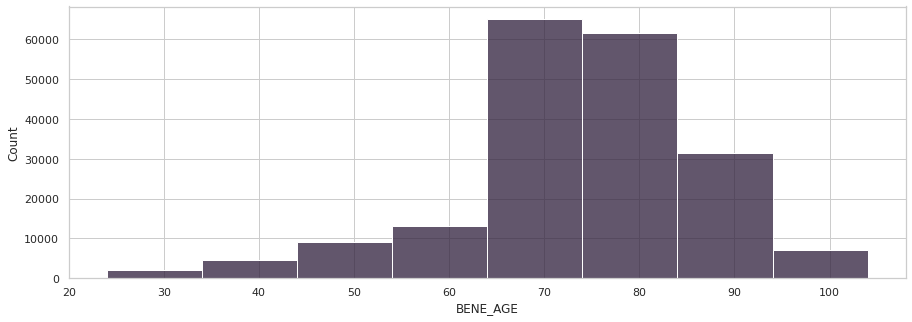

In [15]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.histplot(x=round(desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_AGE"].mean()), binwidth=10)

In [16]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_AGE"].mean().describe()

count    194068.000000
mean         73.159626
std          12.768693
min          24.000000
25%          67.666667
50%          74.000000
75%          81.625000
max         102.000000
Name: BENE_AGE, dtype: float64

## Race Codes

NaN	UNKNOWN

1	NON-HISPANIC WHITE

2	BLACK (OR AFRICAN-AMERICAN)

3	OTHER

4	ASIAN/PACIFIC ISLANDER

5	HISPANIC

6	AMERICAN INDIAN / ALASKA NATIVE

<AxesSubplot:xlabel='BENE_RACE_CD', ylabel='count'>

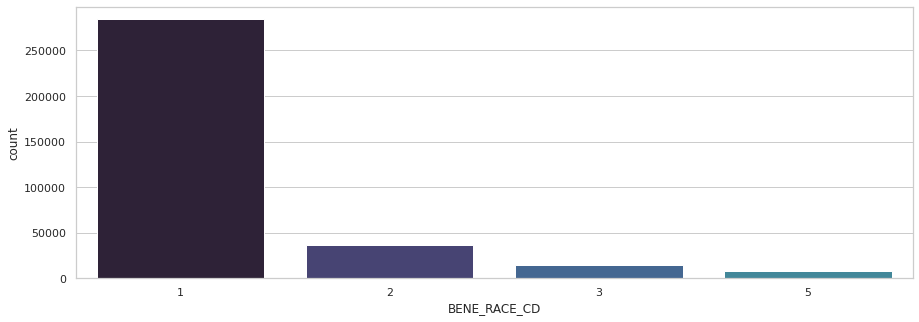

In [17]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=round(desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_RACE_CD"].mean()))

For this data set, the beneficiary population is 84% white, 11% Black or African American, 2.3% Hispanic, and 4% Other.  

Asians / Pacific Islanders and American Indians / AK Natives are not represented.

In [18]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["BENE_RACE_CD"].mean().value_counts(normalize=True)

1    0.826797
2    0.107737
3    0.042233
5    0.023233
Name: BENE_RACE_CD, dtype: float64

## Sex

1 MALE, 2 FEMALE recoded to 1 MALE, 0 FEMALE

<AxesSubplot:xlabel='B_SEX', ylabel='count'>

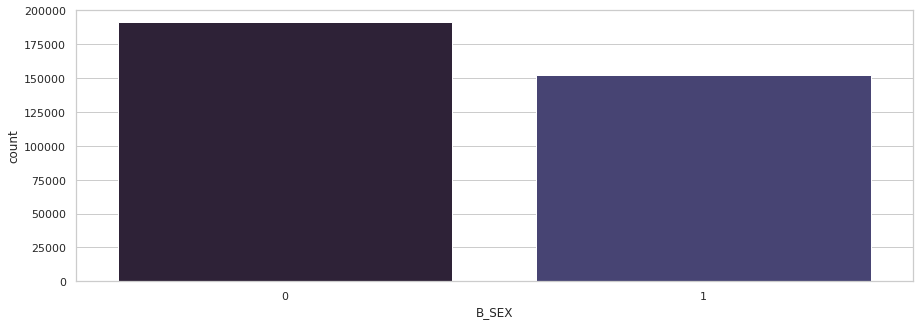

In [19]:
desynpuf["B_SEX"] = desynpuf["BENE_SEX_IDENT_CD"].replace(2, 0)

sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=desynpuf.groupby(["DESYNPUF_ID","YEAR"])["B_SEX"].mean())

In [20]:
desynpuf.groupby(["DESYNPUF_ID","YEAR"])["B_SEX"].mean().value_counts(normalize=True)

0    0.556415
1    0.443585
Name: B_SEX, dtype: float64

## Chronic Conditions

Alzheimer's & Related SP_ALZHDMTA 1=Yes, 2=No

Congestive Heart Failure SP_CHF 1=Yes, 2=No

Cancer SP_CNCR 1=Yes, 2=No

Depression SP_DEPRESSN 1=Yes, 2=No

Diabetes SP_DIABETES 1=Yes, 2=No

Ischemic Heart Disease SP_ISCHMCHT 1=Yes, 2=No

Osteoporosis SP_OSTEOPRS 1=Yes, 2=No

COPD SP_COPD 1=Yes, 2=No

Chronic Kidney Disease SP_CHRNKIDN 1=Yes, 2=No

Rheumatoid or Osteoarthritis SP_RA_OA 1=Yes, 2=No

Stroke or TIA SP_STRKETIA 1=Yes, 2=No

ESRD Y=Yes, 0=No, recoded to 1=Yes, 2=No

In [21]:
desynpuf["SP_ESRD"] = desynpuf["BENE_ESRD_IND"].replace("Y", 1).astype(int)
desynpuf["SP_ESRD"] = desynpuf["SP_ESRD"].replace(0, 2).astype(int)
desynpuf["CLM_ADMSN_DT"] = pd.to_datetime(desynpuf["CLM_ADMSN_DT"], format="%Y%m%d")
desynpuf["NCH_BENE_DSCHRG_DT"] = pd.to_datetime(desynpuf["NCH_BENE_DSCHRG_DT"], format="%Y%m%d")

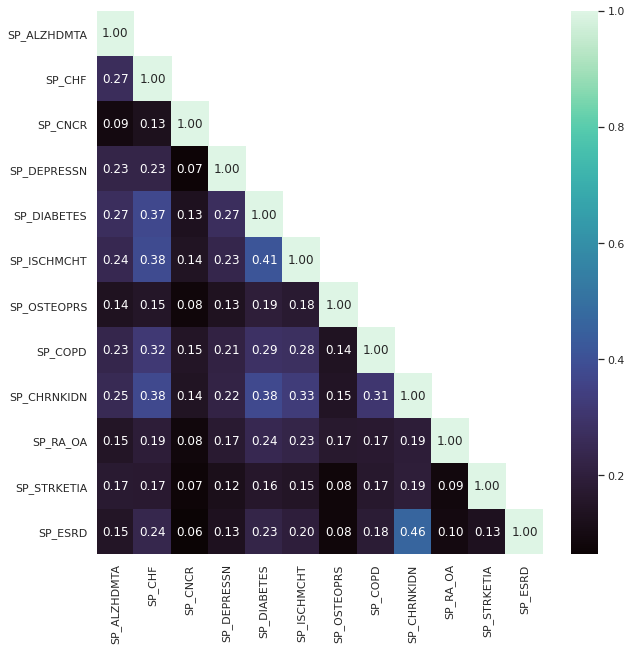

In [22]:
conditions = desynpuf[["SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", 
                        "SP_OSTEOPRS", "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA", "SP_STRKETIA", "SP_ESRD"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.savefig("desynpuf_cc_heatmap.png")

Note the clinically understood correlations between diabetes, ischemic heart disease, CHF and CKD.

They are known to be causally connected on the basis of their pathophysiology.

Obviously, so are ESRD and CKD, which are two points on the same disease continuum.

There are also moderate correlations between depression, dementia, COPD and the DM/CHF/Heart Disease/CKD group.

Strangly, there appears to be a weaker correlation between stroke / TIA and these diseases.

While RA & OA produce similar disability in advanced stages, they have almost nothing in common in terms of pathophysiology or disease course.

In [23]:
# Re-code the conditions indicators as dummy variables
# "SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", SP_OSTEOPRS"
# "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA" and "SP_STRKETIA"  

desynpuf["B_ALZHDMTA"] = desynpuf["SP_ALZHDMTA"].replace(2, 0).astype(int)
desynpuf["B_CHF"] = desynpuf["SP_CHF"].replace(2, 0).astype(int)
desynpuf["B_CNCR"] = desynpuf["SP_CNCR"].replace(2, 0).astype(int)
desynpuf["B_COPD"] = desynpuf["SP_COPD"].replace(2, 0).astype(int)
desynpuf["B_DEPRESSN"] = desynpuf["SP_DEPRESSN"].replace(2, 0).astype(int)
desynpuf["B_DIABETES"] = desynpuf["SP_DIABETES"].replace(2, 0).astype(int)
desynpuf["B_ISCHMCHT"] = desynpuf["SP_ISCHMCHT"].replace(2, 0).astype(int)
desynpuf["B_OSTEOPRS"] = desynpuf["SP_OSTEOPRS"].replace(2, 0).astype(int)
desynpuf["B_CHRNKIDN"] = desynpuf["SP_CHRNKIDN"].replace(2, 0).astype(int)
desynpuf["B_RA_OA"] = desynpuf["SP_RA_OA"].replace(2, 0).astype(int)
desynpuf["B_STRKETIA"] = desynpuf["SP_STRKETIA"].replace(2, 0).astype(int)
desynpuf["B_ESRD"] = desynpuf["SP_ESRD"].replace(2, 0).astype(int)


In [24]:
lb = pre.LabelBinarizer()
BinarizedRace = pd.DataFrame(lb.fit_transform(desynpuf["BENE_RACE_CD"]), 
                             columns=["NH_WHITE", "AA_BLACK", "OTHER", "NW_HISPANIC"])
desynpuf = desynpuf.join(BinarizedRace)
desynpuf.drop(["BENE_SEX_IDENT_CD", "BENE_RACE_CD", "BENE_ESRD_IND", "SP_STATE_CODE", 
               "BENE_COUNTY_CD"], axis=1, inplace=True, errors="ignore")
desynpuf.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,...,B_ISCHMCHT,B_OSTEOPRS,B_CHRNKIDN,B_RA_OA,B_STRKETIA,B_ESRD,NH_WHITE,AA_BLACK,OTHER,NW_HISPANIC
0,0000438E79D01BEA,1937-05-01,NaN,12,12,0,12,2,2,2,...,0,0,0,0,0,0,1,0,0,0
1,00010E7BEA69142C,1938-04-01,NaN,12,12,12,12,1,2,2,...,0,0,0,0,0,0,1,0,0,0
2,00015BF6509E1DF7,1934-05-01,NaN,12,12,0,0,1,1,2,...,0,1,0,0,0,0,1,0,0,0
3,00015BF6509E1DF7,1934-05-01,NaN,12,12,0,0,1,1,2,...,0,1,0,0,0,0,1,0,0,0
4,00015BF6509E1DF7,1934-05-01,NaN,12,12,0,0,1,1,2,...,0,1,0,0,0,0,1,0,0,0


In [25]:
desynpuf["IP_VISITS"] = desynpuf["CLAIM_TYPE"].replace("INPATIENT", 1)
desynpuf["IP_VISITS"] = desynpuf["IP_VISITS"].replace("OUTPATIENT", 0)
desynpuf["OP_VISITS"] = desynpuf["CLAIM_TYPE"].replace("OUTPATIENT", 1)
desynpuf["OP_VISITS"] = desynpuf["OP_VISITS"].replace("INPATIENT", 0)

In [26]:
desynpuf["IP_VISITS"] = desynpuf.IP_VISITS.fillna(0).astype(int)
desynpuf["OP_VISITS"] = desynpuf.OP_VISITS.fillna(0).astype(int)


## Codes per Claim

Count ICD9 Codes per Claim

In [27]:
codes = desynpuf[["ICD9_DGNS_CD_1","ICD9_DGNS_CD_2","ICD9_DGNS_CD_3","ICD9_DGNS_CD_4","ICD9_DGNS_CD_5",
                  "ICD9_DGNS_CD_6","ICD9_DGNS_CD_7","ICD9_DGNS_CD_8","ICD9_DGNS_CD_9","ICD9_DGNS_CD_10",
                  "ICD9_PRCDR_CD_1","ICD9_PRCDR_CD_2","ICD9_PRCDR_CD_3","ICD9_PRCDR_CD_4","ICD9_PRCDR_CD_5",
                  "ICD9_PRCDR_CD_6"]]

desynpuf["CODES_COUNT"] = codes.count(axis=1)
desynpuf["CODES_COUNT"].fillna(0, inplace=True)

## Procedures

HCPCS codes of the Level I Type are Procedure codes; these are 5 digit numbers.

Level II codes start with a letter.

Here, we will store the count of Level I / CPT codes for each beneficiary.

In [28]:
# First, replace any L2-formatted codes with None / NULL

import re

procedures = desynpuf[["HCPCS_CD_1", "HCPCS_CD_2","HCPCS_CD_3","HCPCS_CD_4","HCPCS_CD_5","HCPCS_CD_6","HCPCS_CD_7",
                      "HCPCS_CD_8","HCPCS_CD_9","HCPCS_CD_10","HCPCS_CD_11","HCPCS_CD_12","HCPCS_CD_13",
                      "HCPCS_CD_14","HCPCS_CD_15","HCPCS_CD_16","HCPCS_CD_17","HCPCS_CD_18","HCPCS_CD_19",
                      "HCPCS_CD_20","HCPCS_CD_21","HCPCS_CD_22","HCPCS_CD_23","HCPCS_CD_24","HCPCS_CD_25",
                      "HCPCS_CD_26","HCPCS_CD_27","HCPCS_CD_28","HCPCS_CD_29","HCPCS_CD_30","HCPCS_CD_31",
                      "HCPCS_CD_32","HCPCS_CD_33","HCPCS_CD_34","HCPCS_CD_35","HCPCS_CD_36","HCPCS_CD_37",
                      "HCPCS_CD_38","HCPCS_CD_39","HCPCS_CD_40","HCPCS_CD_41","HCPCS_CD_42","HCPCS_CD_43",
                      "HCPCS_CD_44","HCPCS_CD_45"]]

# Drop rows with NO procedures: new rowcount = 741,581
procedures = procedures.dropna(how="all")

# Drop columns with NO codes: new column count = 44 (0-43)
procedures = procedures.dropna(axis=1, how="all")

# Cast all to type "string"
procedures = procedures.astype("string")

# Replace L2 codes with NULL / NaN because we do not count them as procedures.
procedures = procedures.replace(r"([A-Z]\d{4})", np.nan,regex=True)



In [29]:
# Now that we know we only have L1 / CPT codes, count them for each beneficiary claim

desynpuf["HCPCS_COUNT"] = procedures.count(axis=1)
desynpuf["HCPCS_COUNT"].fillna(0, inplace=True)

In [30]:
desynpuf.head(5)

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,...,B_STRKETIA,B_ESRD,NH_WHITE,AA_BLACK,OTHER,NW_HISPANIC,IP_VISITS,OP_VISITS,CODES_COUNT,HCPCS_COUNT
0,0000438E79D01BEA,1937-05-01,NaN,12,12,0,12,2,2,2,...,0,0,1,0,0,0,0,0,0,0.0
1,00010E7BEA69142C,1938-04-01,NaN,12,12,12,12,1,2,2,...,0,0,1,0,0,0,0,0,0,0.0
2,00015BF6509E1DF7,1934-05-01,NaN,12,12,0,0,1,1,2,...,0,0,1,0,0,0,0,1,2,4.0
3,00015BF6509E1DF7,1934-05-01,NaN,12,12,0,0,1,1,2,...,0,0,1,0,0,0,0,1,7,5.0
4,00015BF6509E1DF7,1934-05-01,NaN,12,12,0,0,1,1,2,...,0,0,1,0,0,0,0,1,1,3.0


## Create Summaries

For each year;
For all 3 years



In [31]:
cc_summary = desynpuf.groupby(["DESYNPUF_ID", "YEAR"]).aggregate({"BENE_AGE":"mean",
                                                                                  "B_SEX":"mean",
                                                                                  "NH_WHITE": "mean",
                                                                                  "AA_BLACK" : "mean",
                                                                                  "OTHER": "mean",
                                                                                  "NW_HISPANIC": "mean",
                                                                                  "B_ALZHDMTA":"sum",
                                                                                  "B_CHF":"sum" ,
                                                                                  "B_CNCR":"sum",
                                                                                  "B_COPD":"sum",
                                                                                  "B_DEPRESSN":"sum",
                                                                                  "B_DIABETES":"sum",
                                                                                  "B_ISCHMCHT":"sum",
                                                                                  "B_OSTEOPRS":"sum",
                                                                                  "B_CHRNKIDN":"sum",
                                                                                  "B_RA_OA":"sum",
                                                                                  "B_STRKETIA":"sum",
                                                                                  "B_ESRD":"sum",
                                                                                  "BENE_HI_CVRAGE_TOT_MONS":"mean",
                                                                                  "BENE_SMI_CVRAGE_TOT_MONS":"mean",
                                                                                  "BENE_HMO_CVRAGE_TOT_MONS":"mean",
                                                                                  "PLAN_CVRG_MOS_NUM":"mean",
                                                                                  "CLAIM_TYPE":"count",
                                                                                  "IP_VISITS":"sum",
                                                                                  "OP_VISITS":"sum",
                                                                                  "CODES_COUNT":"sum",
                                                                                  "HCPCS_COUNT":"sum",
                                                                                  "PRVDR_NUM":"nunique",
                                                                                  "AT_PHYSN_NPI":"nunique",
                                                                                  "OP_PHYSN_NPI":"nunique",
                                                                                  "OT_PHYSN_NPI":"nunique",
                                                                                  "CLM_UTLZTN_DAY_CNT":["sum","mean"],
                                                                                  "MEDREIMB_IP":"sum",
                                                                                  "BENRES_IP":"sum",
                                                                                  "PPPYMT_IP":"sum",
                                                                                  "MEDREIMB_OP":"sum",
                                                                                  "BENRES_OP":"sum",
                                                                                  "PPPYMT_OP":"sum",
                                                                                  "CBSA":"mean",
                                                                                  "FIPS_STATE_CODE":"mean",
                                                                                  "FIPS_COUNTY_CODE":"mean"})



In [32]:
cc_summary.columns = ["MEAN_AGE", "PROP_SEX", "NH_WHITE", "AA_BLACK", "OTHER", "NW_HISPANIC", "B_ALZHDMTA", 
                      "B_CHF", "B_CNCR", "B_COPD", "B_DEPRESSN", "B_DIABETES", "B_ISCHMCHT", "B_OSTEOPRS", 
                      "B_CHRNKIDN", "B_RA_OA","B_STRKETIA", "B_ESRD", "MEAN_HI_CVRAGE_TOT_MONS", 
                      "MEAN_SMI_CVRAGE_TOT_MONS","MEAN_HMO_CVRAGE_TOT_MONS", "MEAN_CVRG_MOS_NUM", 
                      "TOTAL_VISITS", "IP_VISITS", "OP_VISITS", "CODES_CT", "PROCEDURE_CT", "NUM_PRVDRS", 
                      "NUM_AT_PHYSNS", "NUM_OP_PHYSNS","NUM_OT_PHYSNS", "TOTAL_INP_DAYS", "MEAN_INP_STAY", 
                      "TOT_MEDREIMB_IP", "TOT_BENRES_IP", "TOT_PPPYMT_IP", "TOT_MEDREIMB_OP",
                      "TOT_BENRES_OP","TOT_PPPYMT_OP","CBSA", "FIPS_STATE_CODE","FIPS_COUNTY_CODE"]

In [33]:

cc_summary.loc[cc_summary["B_ALZHDMTA"]>1, "B_ALZHDMTA"] = 1
cc_summary.loc[cc_summary["B_CHF"]>1, "B_CHF"] = 1
cc_summary.loc[cc_summary["B_CNCR"]>1, "B_CNCR"] = 1
cc_summary.loc[cc_summary["B_COPD"]>1, "B_COPD"] = 1
cc_summary.loc[cc_summary["B_DEPRESSN"]>1, "B_DEPRESSN"] = 1
cc_summary.loc[cc_summary["B_DIABETES"]>1, "B_DIABETES"] = 1
cc_summary.loc[cc_summary["B_ISCHMCHT"]>1, "B_ISCHMCHT"] = 1
cc_summary.loc[cc_summary["B_OSTEOPRS"]>1, "B_OSTEOPRS"] = 1
cc_summary.loc[cc_summary["B_CHRNKIDN"]>1, "B_CHRNKIDN"] = 1
cc_summary.loc[cc_summary["B_RA_OA"]>1, "B_RA_OA"] = 1
cc_summary.loc[cc_summary["B_STRKETIA"]>1, "B_STRKETIA"] = 1
cc_summary.loc[cc_summary["B_ESRD"]>1, "B_ESRD"] = 1

cc_summary["TOTCHRONIC"] = cc_summary["B_ALZHDMTA"] + cc_summary["B_CHF"] + cc_summary["B_CNCR"] + cc_summary["B_COPD"] + cc_summary["B_DEPRESSN"] + cc_summary["B_DIABETES"] + cc_summary["B_ISCHMCHT"] + cc_summary["B_OSTEOPRS"] + cc_summary["B_CHRNKIDN"] + cc_summary["B_RA_OA"] + cc_summary["B_STRKETIA"]
cc_summary["TOTIPCOST"] = cc_summary["TOT_MEDREIMB_IP"] + cc_summary["TOT_BENRES_IP"] + cc_summary["TOT_PPPYMT_IP"]
cc_summary["TOTOPCOST"] = cc_summary["TOT_MEDREIMB_OP"] + cc_summary["TOT_BENRES_OP"] + cc_summary["TOT_PPPYMT_OP"]
cc_summary["ALLCOSTS"] = cc_summary["TOTIPCOST"] + cc_summary["TOTOPCOST"]


## New Variable

NEW_CHRONIC: Number of new conditions during the period (2008-2010)

Will become an aggregated incidence measure

In [35]:
c = cc_summary.copy()
c = c.reset_index()
CCs_2008 = c.loc[c["YEAR"] == 2008, "TOTCHRONIC"]
CCs_2010 = c.loc[c["YEAR"] == 2010, "TOTCHRONIC"]

c.loc[c["YEAR"] == 2008, "NEW_CHRONIC"] = 0
c.loc[c["YEAR"] == 2009, "NEW_CHRONIC"] = 0
c.loc[c["YEAR"] == 2010, "NEW_CHRONIC"] = CCs_2010.subtract(CCs_2008, fill_value=0)

In [36]:
# Combine Coverage Data and Number of Providers
c["MEAN_CVRG_MOS"] = c["MEAN_HI_CVRAGE_TOT_MONS"].copy()
c["MEAN_RX_CVRG_MOS"] = c["MEAN_CVRG_MOS_NUM"].copy()
c.drop(["MEAN_HI_CVRAGE_TOT_MONS", "MEAN_SMI_CVRAGE_TOT_MONS", "MEAN_HMO_CVRAGE_TOT_MONS", "MEAN_CVRG_MOS_NUM",
       "NUM_AT_PHYSNS", "NUM_OP_PHYSNS", "NUM_OT_PHYSNS"], axis=1, inplace=True)

In [37]:
cc_summary_all = c.groupby("DESYNPUF_ID").aggregate({"YEAR":"count",
                                                     "MEAN_AGE":"mean",
                                                     "PROP_SEX":"mean",
                                                     "NH_WHITE":"mean",
                                                     "AA_BLACK":"mean",
                                                     "OTHER":"mean",
                                                     "NW_HISPANIC":"mean",
                                                     "B_ALZHDMTA":"mean",
                                                     "B_CHF":"mean",
                                                     "B_CNCR":"mean",
                                                     "B_COPD":"mean",
                                                     "B_DEPRESSN":"mean",
                                                     "B_DIABETES":"mean",
                                                     "B_ISCHMCHT":"mean",
                                                     "B_OSTEOPRS":"mean",
                                                     "B_CHRNKIDN":"mean",
                                                     "B_RA_OA":"mean",
                                                     "B_STRKETIA":"mean",
                                                     "B_ESRD":"mean",
                                                     "MEAN_CVRG_MOS":"mean",
                                                     "MEAN_RX_CVRG_MOS":"mean",
                                                     "TOTAL_VISITS":"sum",
                                                     "IP_VISITS":"sum",
                                                     "OP_VISITS":"sum",
                                                     "CODES_CT":"mean",
                                                     "PROCEDURE_CT":"mean",
                                                     "NUM_PRVDRS":"mean",
                                                     "TOTAL_INP_DAYS":"sum",
                                                     "MEAN_INP_STAY": "mean",
                                                     "TOT_MEDREIMB_IP":"sum",
                                                     "TOT_BENRES_IP":"sum",
                                                     "TOT_PPPYMT_IP":"sum",
                                                     "TOT_MEDREIMB_OP":"sum",
                                                     "TOT_BENRES_OP":"sum",
                                                     "TOT_PPPYMT_OP":"sum",
                                                     "CBSA":"mean",
                                                     "FIPS_STATE_CODE":"mean",
                                                     "FIPS_COUNTY_CODE":"mean", 
                                                     "TOTIPCOST":"sum",
                                                     "TOTOPCOST":"sum",
                                                     "ALLCOSTS":"sum",
                                                     "NEW_CHRONIC":"sum"})




In [38]:
cc_summary_all.columns = ["YEAR_CNT", "MEAN_AGE", "B_SEX", "NH_WHITE", "AA_BLACK", "OTHER", "NW_HISPANIC",
                          "B_ALZHDMTA", "B_CHF", "B_CNCR", "B_COPD","B_DEPRESSN", "B_DIABETES", 
                          "B_ISCHMCHT", "B_OSTEOPRS", "B_CHRNKIDN", "B_RA_OA","B_STRKETIA", "B_ESRD", 
                          "MEAN_CVRG_MOS_PY", "MEAN_RX_CVRG_MOS_PY", "TOTAL_VISITS", "IP_VISITS", 
                           "OP_VISITS", "MEAN_CODES_CT", "MEAN_PROCEDURE_CT", "MEAN_NUM_PRVDRS", 
                          "TOTAL_INP_DAYS", "MEAN_INP_STAY", "TOT_MEDREIMB_IP", "TOT_BENRES_IP", "TOT_PPPYMT_IP", 
                          "TOT_MEDREIMB_OP", "TOT_BENRES_OP","TOT_PPPYMT_OP", "CBSA", "FIPS_STATE_CODE",
                          "FIPS_COUNTY_CODE", "TOTIPCOST", "TOTOPCOST", "ALLCOSTS", "NEW_CHRONIC"]

In [39]:
cc_summary_all.loc[cc_summary_all["B_ALZHDMTA"]>0, "B_ALZHDMTA"] = 1
cc_summary_all.loc[cc_summary_all["B_CHF"]>0, "B_CHF"] = 1
cc_summary_all.loc[cc_summary_all["B_CNCR"]>0, "B_CNCR"] = 1
cc_summary_all.loc[cc_summary_all["B_COPD"]>0, "B_COPD"] = 1
cc_summary_all.loc[cc_summary_all["B_DEPRESSN"]>0, "B_DEPRESSN"] = 1
cc_summary_all.loc[cc_summary_all["B_DIABETES"]>0, "B_DIABETES"] = 1
cc_summary_all.loc[cc_summary_all["B_ISCHMCHT"]>0, "B_ISCHMCHT"] = 1
cc_summary_all.loc[cc_summary_all["B_OSTEOPRS"]>0, "B_OSTEOPRS"] = 1
cc_summary_all.loc[cc_summary_all["B_CHRNKIDN"]>0, "B_CHRNKIDN"] = 1
cc_summary_all.loc[cc_summary_all["B_RA_OA"]>0, "B_RA_OA"] = 1
cc_summary_all.loc[cc_summary_all["B_STRKETIA"]>0, "B_STRKETIA"] = 1
cc_summary_all.loc[cc_summary_all["B_ESRD"]>0, "B_ESRD"] = 1

cc_summary_all["TOTCHRONIC"] = cc_summary_all["B_ALZHDMTA"] + cc_summary_all["B_CHF"] + cc_summary_all["B_CNCR"] + cc_summary_all["B_COPD"] + cc_summary_all["B_DEPRESSN"] + cc_summary_all["B_DIABETES"] + cc_summary_all["B_ISCHMCHT"] + cc_summary_all["B_OSTEOPRS"] + cc_summary_all["B_CHRNKIDN"] + cc_summary_all["B_RA_OA"] + cc_summary_all["B_STRKETIA"]
cc_summary_all["MEAN_AGE"] = cc_summary_all["MEAN_AGE"].round(decimals=1)
cc_summary_all["VISITS_FLAG"] = 0
cc_summary_all.loc[cc_summary_all["TOTAL_VISITS"]>0, "VISITS_FLAG"] = 1

<AxesSubplot:xlabel='TOTCHRONIC', ylabel='count'>

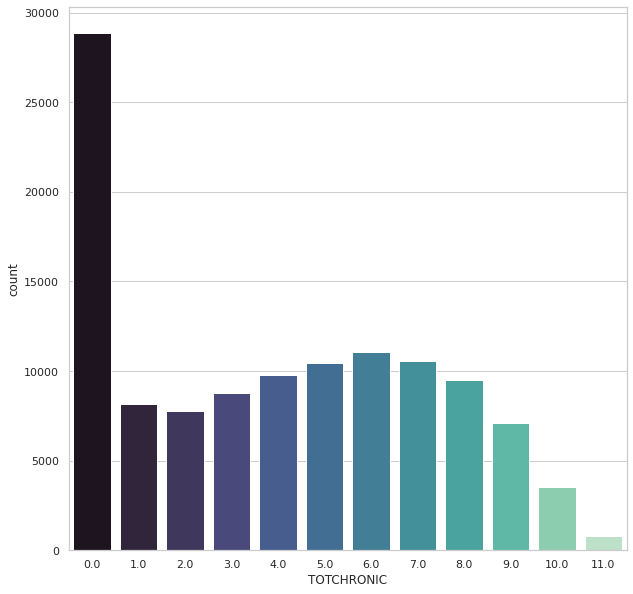

In [40]:
plt.rcParams["figure.figsize"] = (10.0, 10.0)
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(data=cc_summary_all, x="TOTCHRONIC", palette="mako")

<AxesSubplot:xlabel='NEW_CHRONIC', ylabel='count'>

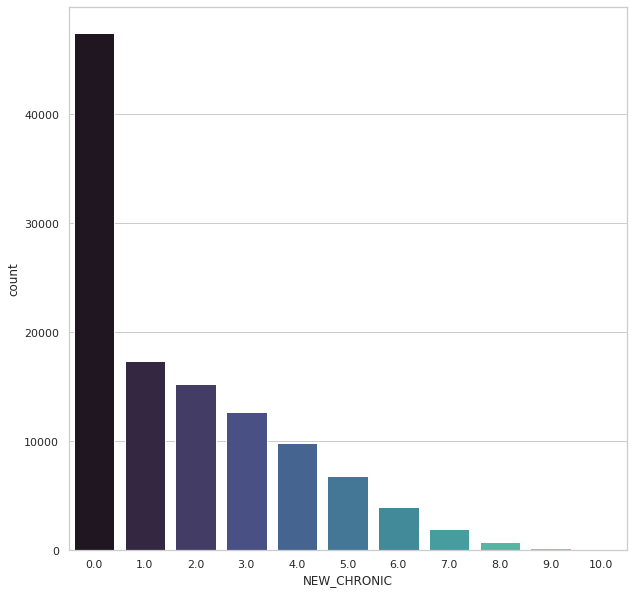

In [41]:
plt.rcParams["figure.figsize"] = (10.0, 10.0)
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(data=cc_summary_all, x="NEW_CHRONIC", palette="mako")

## Prevalence

Over the three year period, 25% of the beneficiaries had none of the noted chronic conditions.

7% had 1, 

7% had 2, 

8% had 3, 

8% had 4, 

9% had 5, 

10% had 6,

9% had 7,

8% had 8,

and the remaining 9% had 9 or more.


In [42]:
cc_summary_all["TOTCHRONIC"].value_counts(normalize=True)

0.0     0.248240
6.0     0.095205
7.0     0.090657
5.0     0.089600
4.0     0.084022
8.0     0.081856
3.0     0.075366
1.0     0.070320
2.0     0.066659
9.0     0.061097
10.0    0.030342
11.0    0.006636
Name: TOTCHRONIC, dtype: float64

## Incidence

New chronic conditions during the three year period.

41% had no new chronic conditions.

15% had 1 new chronic condition.

13% had 2 new chronic conditions.

11% had 3 new chronic conditions.

8.5% had 4 new chronic conditions.

5.8% had 5 new chronic conditions.

3.4% had 6 new chronic conditions.

1.6% had 7 new chronic conditions.

<1% had 8-10 new chronic conditions.

In [43]:
cc_summary_all["NEW_CHRONIC"].value_counts(normalize=True)

0.0     0.408152
1.0     0.149400
2.0     0.131254
3.0     0.109233
4.0     0.084838
5.0     0.058347
6.0     0.034236
7.0     0.016418
8.0     0.006258
9.0     0.001633
10.0    0.000232
Name: NEW_CHRONIC, dtype: float64

In [44]:
desynpuf.drop(["SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", "SP_ESRD",
              "SP_OSTEOPRS", "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA", "SP_STRKETIA"], inplace=True, axis=1)

desynpuf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991604 entries, 0 to 991603
Columns: 127 entries, DESYNPUF_ID to HCPCS_COUNT
dtypes: datetime64[ns](2), float64(31), int64(25), object(69)
memory usage: 960.8+ MB


## Visits 2008-2010

Total Inpatient Claims: 66,029

Total Outpatient Claims: 776,259

In [45]:
claims_breakdown = desynpuf.groupby(["YEAR", "CLAIM_TYPE"])["CLAIM_TYPE"].count().to_frame()
claims_breakdown.columns = ["COUNT"]
claims_breakdown.head(6)

COUNT
YEAR CLAIM_TYPE        
2008 INPATIENT    27240
     OUTPATIENT  282069
2009 INPATIENT    24873
     OUTPATIENT  320990
2010 INPATIENT    13916
     OUTPATIENT  173200

In [46]:
desynpuf["CLAIM_TYPE"].value_counts()

OUTPATIENT    776259
INPATIENT      66029
Name: CLAIM_TYPE, dtype: int64

As the total number of chronic conditions increases, the total visits increases.

No surprises there!

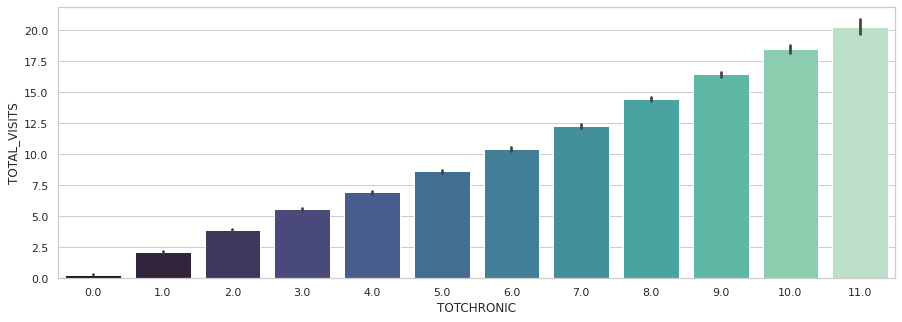

In [47]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x="TOTCHRONIC", y="TOTAL_VISITS", data=cc_summary_all, palette="mako");

Costs also increased as number of conditions increased, really beginning to take off after 6 chronic conditions.

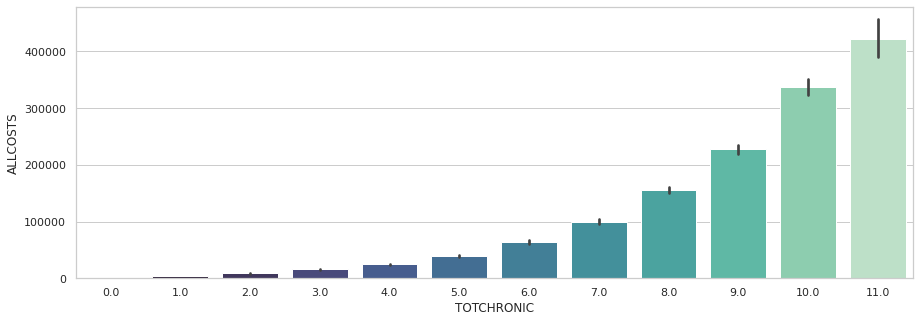

In [51]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x="TOTCHRONIC", y="ALLCOSTS", data=cc_summary_all, palette="mako");

In [52]:
SUM_TOTAL = cc_summary_all["ALLCOSTS"].sum()
cc_summary_all["PERCENT_COSTS"] = cc_summary_all["ALLCOSTS"] / SUM_TOTAL * 100

## Join Elixhauser Scores

Add scores from elix DataFrame

In [53]:
cc_summary_all = cc_summary_all.reset_index()
ELIX_FIPS = ELIX_FIPS.reset_index()

In [54]:
cc_summary_all = pd.merge(cc_summary_all, ELIX_FIPS, on=["DESYNPUF_ID"], how='left')

In [55]:
cc_summary_all.head(10)

,DESYNPUF_ID,YEAR_CNT,MEAN_AGE,B_SEX,NH_WHITE,AA_BLACK,OTHER,NW_HISPANIC,B_ALZHDMTA,B_CHF,...,TOTOPCOST,ALLCOSTS,NEW_CHRONIC,TOTCHRONIC,VISITS_FLAG,PERCENT_COSTS,MEAN_ELIX_GRP_TOT,MEAN_ELIX_SCORE,FIPS_COUNTY_CODE_y,FIPS_STATE_CODE_y
0,0000438E79D01BEA,3,NaN,1,1,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,57.0,12.0
1,00010E7BEA69142C,2,71.0,0,1,0,0,0,1.0,0.0,...,1620.0,1620.0,0.0,2.0,1,0.000022,0.333333,0.500000,3.0,10.0
2,00015BF6509E1DF7,3,75.1,0,1,0,0,0,1.0,1.0,...,25860.0,25860.0,3.0,7.0,1,0.000356,0.555556,0.555556,119.0,37.0
3,00018DD17736A661,1,73.0,0,1,0,0,0,0.0,0.0,...,6930.0,6930.0,0.0,2.0,1,0.000095,0.428571,1.571429,101.0,26.0
4,000240D599ED789C,3,67.0,0,0,1,0,0,1.0,1.0,...,47330.0,509056.0,5.0,6.0,1,0.007014,0.766667,2.016667,35.0,55.0
5,0003E73AFBA840A8,3,NaN,0,1,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,55.0,36.0
6,00040FBA47F90D4F,3,84.4,0,1,0,0,0,1.0,1.0,...,21730.0,21730.0,3.0,6.0,1,0.000299,0.333333,1.266667,35.0,34.0
7,000588F33B7B0753,3,77.7,0,1,0,0,0,0.0,1.0,...,128750.0,508222.0,2.0,7.0,1,0.007002,0.604167,1.000000,113.0,19.0
8,0006071C876CEADF,3,78.0,0,1,0,0,0,0.0,1.0,...,3980.0,3980.0,0.0,6.0,1,0.000055,0.166667,0.000000,141.0,48.0
9,0006CB5289978FD8,3,90.0,0,0,1,0,0,1.0,1.0,...,24800.0,380784.0,3.0,9.0,1,0.005246,1.375000,3.875000,75.0,6.0


In [58]:
cc_summary_all["IP_VISIT_PROP"] = cc_summary_all["IP_VISITS"]/cc_summary_all["TOTAL_VISITS"]
cc_summary_all["IP_VISIT_PROP"].fillna(0, inplace=True)
cc_summary_all.head(10)

,DESYNPUF_ID,YEAR_CNT,MEAN_AGE,B_SEX,NH_WHITE,AA_BLACK,OTHER,NW_HISPANIC,B_ALZHDMTA,B_CHF,...,ALLCOSTS,NEW_CHRONIC,TOTCHRONIC,VISITS_FLAG,PERCENT_COSTS,MEAN_ELIX_GRP_TOT,MEAN_ELIX_SCORE,FIPS_COUNTY_CODE_y,FIPS_STATE_CODE_y,IP_VISIT_PROP
0,0000438E79D01BEA,3,NaN,1,1,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,57.0,12.0,0.000000
1,00010E7BEA69142C,2,71.0,0,1,0,0,0,1.0,0.0,...,1620.0,0.0,2.0,1,0.000022,0.333333,0.500000,3.0,10.0,0.000000
2,00015BF6509E1DF7,3,75.1,0,1,0,0,0,1.0,1.0,...,25860.0,3.0,7.0,1,0.000356,0.555556,0.555556,119.0,37.0,0.000000
3,00018DD17736A661,1,73.0,0,1,0,0,0,0.0,0.0,...,6930.0,0.0,2.0,1,0.000095,0.428571,1.571429,101.0,26.0,0.000000
4,000240D599ED789C,3,67.0,0,0,1,0,0,1.0,1.0,...,509056.0,5.0,6.0,1,0.007014,0.766667,2.016667,35.0,55.0,0.150000
5,0003E73AFBA840A8,3,NaN,0,1,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,55.0,36.0,0.000000
6,00040FBA47F90D4F,3,84.4,0,1,0,0,0,1.0,1.0,...,21730.0,3.0,6.0,1,0.000299,0.333333,1.266667,35.0,34.0,0.000000
7,000588F33B7B0753,3,77.7,0,1,0,0,0,0.0,1.0,...,508222.0,2.0,7.0,1,0.007002,0.604167,1.000000,113.0,19.0,0.121212
8,0006071C876CEADF,3,78.0,0,1,0,0,0,0.0,1.0,...,3980.0,0.0,6.0,1,0.000055,0.166667,0.000000,141.0,48.0,0.000000
9,0006CB5289978FD8,3,90.0,0,0,1,0,0,1.0,1.0,...,380784.0,3.0,9.0,1,0.005246,1.375000,3.875000,75.0,6.0,0.250000


In [59]:
cc_summary.to_csv("/home/kylier/python/DS/data/PUF/PUF_BENE_SUMMARY_YEARS.csv")

In [60]:
cc_summary_all.to_csv("/home/kylier/python/DS/data/PUF/PUF_BENE_SUMMARY_ALL.csv")